In [168]:
from rdkit import Chem
from rdkit.Chem import Draw, Recap

In [169]:
# molecule_grid = [["molecule"] + [""] * 8]
molecule_grid = [["O"] + [""] * 7]
print(f"{molecule_grid=}")

# f1_grid = [["f1"], [""], [""]]
# f2_grid = [["f2", "", "", ""], ["f21", "f22", "", "f23"], ["", "f221", "f222", ""]]
# f3_grid = [["f3"], [""], [""]]
# f4_grid = [["f4", ""], ["f41", "f42"], ["", "", ""]]
f1_grid = [["C"], [""], [""]]
f2_grid = [
    ["CC", "", "", ""],
    ["CCN", "CCNN", "", "CCNNN"],
    ["", "CCNNO", "CCNNOO", ""],
]
f3_grid = [["CCC"], [""], [""]]
f4_grid = [["CCCC", ""], ["CCCCN", "CCCCNN"], ["", "", ""]]

grid = list(zip(f1_grid, f2_grid, f3_grid, f4_grid))
print(f"{grid=}")

print("grid rows:")
for row in grid:
    # Remove tuple, flatten into single list
    flat_row = [item for sublist in row for item in sublist]
    molecule_grid.append(flat_row)
    # print(f"{flat_row=}")

# molecule_grid = molecule_grid + grid

molecule_grid_flat = [item for sublist in molecule_grid for item in sublist]

print(f"{molecule_grid_flat=}")

molecule_grid=[['O', '', '', '', '', '', '', '']]
grid=[(['C'], ['CC', '', '', ''], ['CCC'], ['CCCC', '']), ([''], ['CCN', 'CCNN', '', 'CCNNN'], [''], ['CCCCN', 'CCCCNN']), ([''], ['', 'CCNNO', 'CCNNOO', ''], [''], ['', '', ''])]
grid rows:
molecule_grid_flat=['O', '', '', '', '', '', '', '', 'C', 'CC', '', '', '', 'CCC', 'CCCC', '', '', 'CCN', 'CCNN', '', 'CCNNN', '', 'CCCCN', 'CCCCNN', '', '', 'CCNNO', 'CCNNOO', '', '', '', '', '']


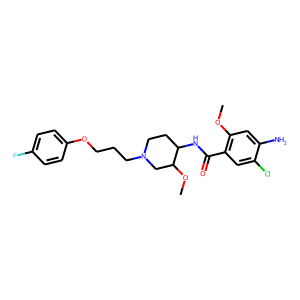

In [170]:
cisapride = Chem.MolFromSmiles("Clc1cc(c(OC)cc1N)C(=O)NC3CCN(CCCOc2ccc(F)cc2)CC3OC")
Draw.MolToImage(cisapride)

In [196]:
def molecule_recap_tree(smiles:str):
    molecule = Chem.MolFromSmiles(smiles)
    hierarch = Recap.RecapDecompose(molecule)
    root = NonBinTree(hierarch.smiles)
    molecule_tree = get_children(hierarch, root)
    recap_2D = molecule_tree.get_grid()
    mols_per_row = len(recap_2D[0])
    recap_plot = [item for sublist in recap_2D for item in sublist]
    drawing = Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in recap_plot], molsPerRow=mols_per_row)
    return drawing

*C(=O)c1cc(Cl)c(N)cc1OC
*NC1CCN(CCCOc2ccc(F)cc2)CC1OC
 *NC1CCN(*)CC1OC
 *CCCOc1ccc(F)cc1
 *c1ccc(F)cc1
 *CCCN1CCC(N*)C(OC)C1
*CCCOc1ccc(F)cc1
*N1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1
 *NC1CCN(*)CC1OC
 *C(=O)c1cc(Cl)c(N)cc1OC
*c1ccc(F)cc1
*CCCN1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1
 *C(=O)c1cc(Cl)c(N)cc1OC
 *CCCN1CCC(N*)C(OC)C1


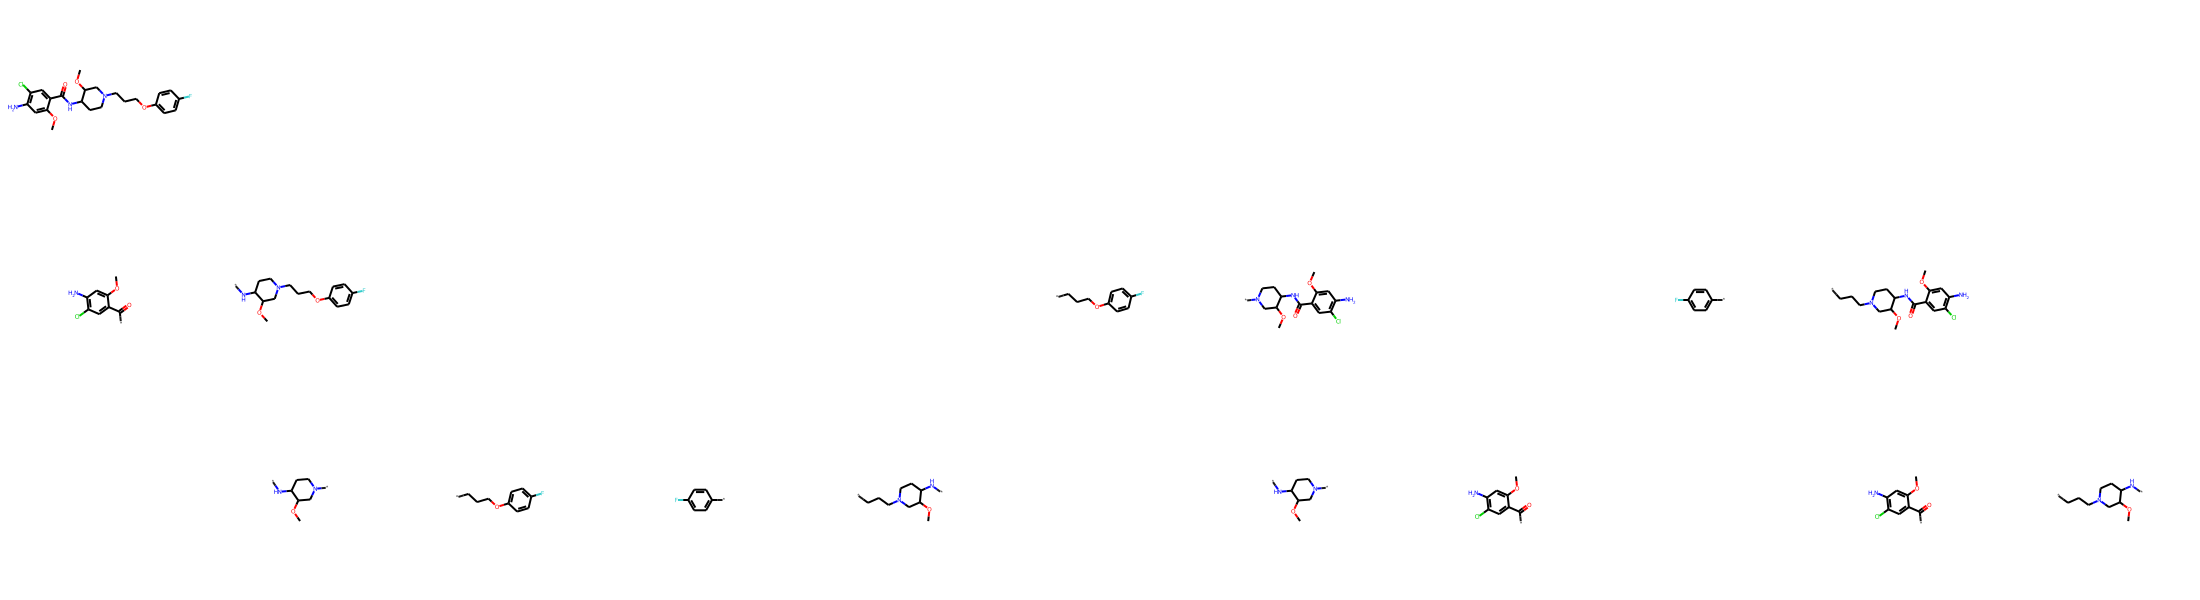

In [197]:
molecule_recap_tree("Clc1cc(c(OC)cc1N)C(=O)NC3CCN(CCCOc2ccc(F)cc2)CC3OC")

In [171]:
hierarch = Recap.RecapDecompose(cisapride)
hierarch.smiles

'COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)CC1OC'

In [172]:
ks = hierarch.children.keys()
ks = sorted(ks)
ks

['*C(=O)c1cc(Cl)c(N)cc1OC',
 '*CCCN1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1',
 '*CCCOc1ccc(F)cc1',
 '*N1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1',
 '*NC1CCN(CCCOc2ccc(F)cc2)CC1OC',
 '*c1ccc(F)cc1']

In [192]:
def get_children(base_node: Chem.Recap.RecapHierarchyNode, root:NonBinTree = None, level:int=0): #, level, cols=0):
    # root = NonBinTree("base_node")
    for smiles, node in base_node.children.items():
        added_tree_node = root.add_node(smiles)
        spaces = " " * level
        # print(f"{spaces}{smiles}")
        children = node.children.keys()
        children = sorted(children)
        if len(children) > 0:
            # get_children(node, root)
            get_children(node, added_tree_node, level + 1)
            # print(f"{children=}")
        # else:
        #     cols += 1
        #     print(f"{cols=}")
            # return cols
    return root

root = NonBinTree(hierarch.smiles)

molecule_tree = get_children(hierarch, root)
# print(molecule_tree)

*C(=O)c1cc(Cl)c(N)cc1OC
*NC1CCN(CCCOc2ccc(F)cc2)CC1OC
 *NC1CCN(*)CC1OC
 *CCCOc1ccc(F)cc1
 *c1ccc(F)cc1
 *CCCN1CCC(N*)C(OC)C1
*CCCOc1ccc(F)cc1
*N1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1
 *NC1CCN(*)CC1OC
 *C(=O)c1cc(Cl)c(N)cc1OC
*c1ccc(F)cc1
*CCCN1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1
 *C(=O)c1cc(Cl)c(N)cc1OC
 *CCCN1CCC(N*)C(OC)C1
NonBinTree(COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)CC1OC): [NonBinTree(*C(=O)c1cc(Cl)c(N)cc1OC): [], NonBinTree(*NC1CCN(CCCOc2ccc(F)cc2)CC1OC): [NonBinTree(*NC1CCN(*)CC1OC): [], NonBinTree(*CCCOc1ccc(F)cc1): [], NonBinTree(*c1ccc(F)cc1): [], NonBinTree(*CCCN1CCC(N*)C(OC)C1): []], NonBinTree(*CCCOc1ccc(F)cc1): [], NonBinTree(*N1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1): [NonBinTree(*NC1CCN(*)CC1OC): [], NonBinTree(*C(=O)c1cc(Cl)c(N)cc1OC): []], NonBinTree(*c1ccc(F)cc1): [], NonBinTree(*CCCN1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1): [NonBinTree(*C(=O)c1cc(Cl)c(N)cc1OC): [], NonBinTree(*CCCN1CCC(N*)C(OC)C1): []]]


mols_per_row=11


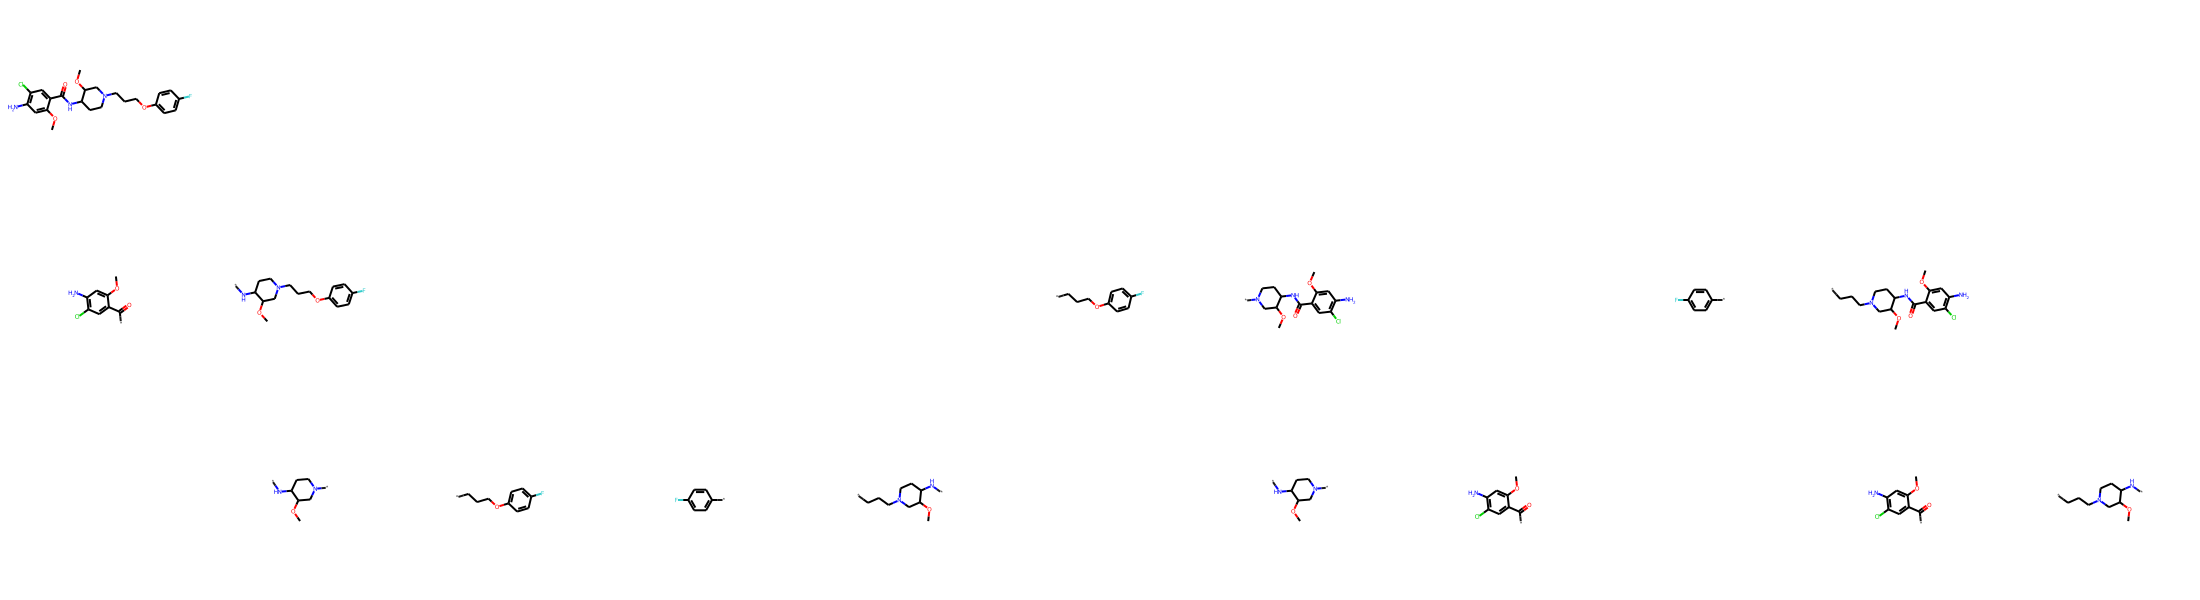

In [190]:
def concat(grid1, grid2):
    if grid1 == [[]]:
        combined = grid2
    elif grid2 == [[]]:
        combined = grid1
    else:
        combined = []
        for row_counter in range(len(grid1)):
            combined += [grid1[row_counter] + grid2[row_counter]]
    return combined

class NonBinTree:
    """Adapted from https://stackoverflow.com/questions/60579330/non-binary-tree-data-structure-in-python#60579464"""

    def __init__(self, val):
        self.val = val
        self.nodes = []

    def add_node(self, val):
        self.nodes.append(NonBinTree(val))
        return self.nodes[-1]

    def __repr__(self):
        return f"NonBinTree({self.val}): {self.nodes}"

    def get_ncols(self):
        self.ncols = 0
        if len(self.nodes) > 0:
            # If there are nodes under this one, call get_ncols on them recursively
            for node in self.nodes:
                self.ncols += node.get_ncols()
        else:
            # If there are no nodes under this one, add 1 for this node
            self.ncols += 1
        return self.ncols

    def get_max_depth(self):
        max_depth = 0
        if len(self.nodes) > 0:
            for node in self.nodes:
                this_depth = node.get_max_depth()
                max_depth = max(this_depth + 1, max_depth)
        else:
            max_depth = max(1, max_depth)
        self.max_depth = max_depth
        return self.max_depth

    def get_grid(self):
        self_cols = self.get_ncols()
        self_rows = self.get_max_depth()

        # Create top row: Node value, then the rest of columns are blank (empty strings)
        grid = [[self.val] + [""] * (self.ncols - 1)]

        n_nodes = len(self.nodes)
        if n_nodes > 0:
            nodes_grid = [[]]
            for node_counter, node in enumerate(self.nodes):
                node_grid = node.get_grid()

                if self.val == "Fe":
                    ...
                # Add spacer rows if needed
                node_grid_rows = len(node_grid)
                rows_padding = self_rows - node_grid_rows - 1
                for padding in range(rows_padding):
                    node_grid += [[""] * len(node_grid[0])]

                nodes_grid = concat(nodes_grid, node_grid)

            grid += nodes_grid

        return grid

recap_2D = molecule_tree.get_grid()

recap_2D = root.get_grid()
mols_per_row = len(recap_2D[0])
recap_plot = [item for sublist in recap_2D for item in sublist]
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in recap_plot], molsPerRow=mols_per_row)


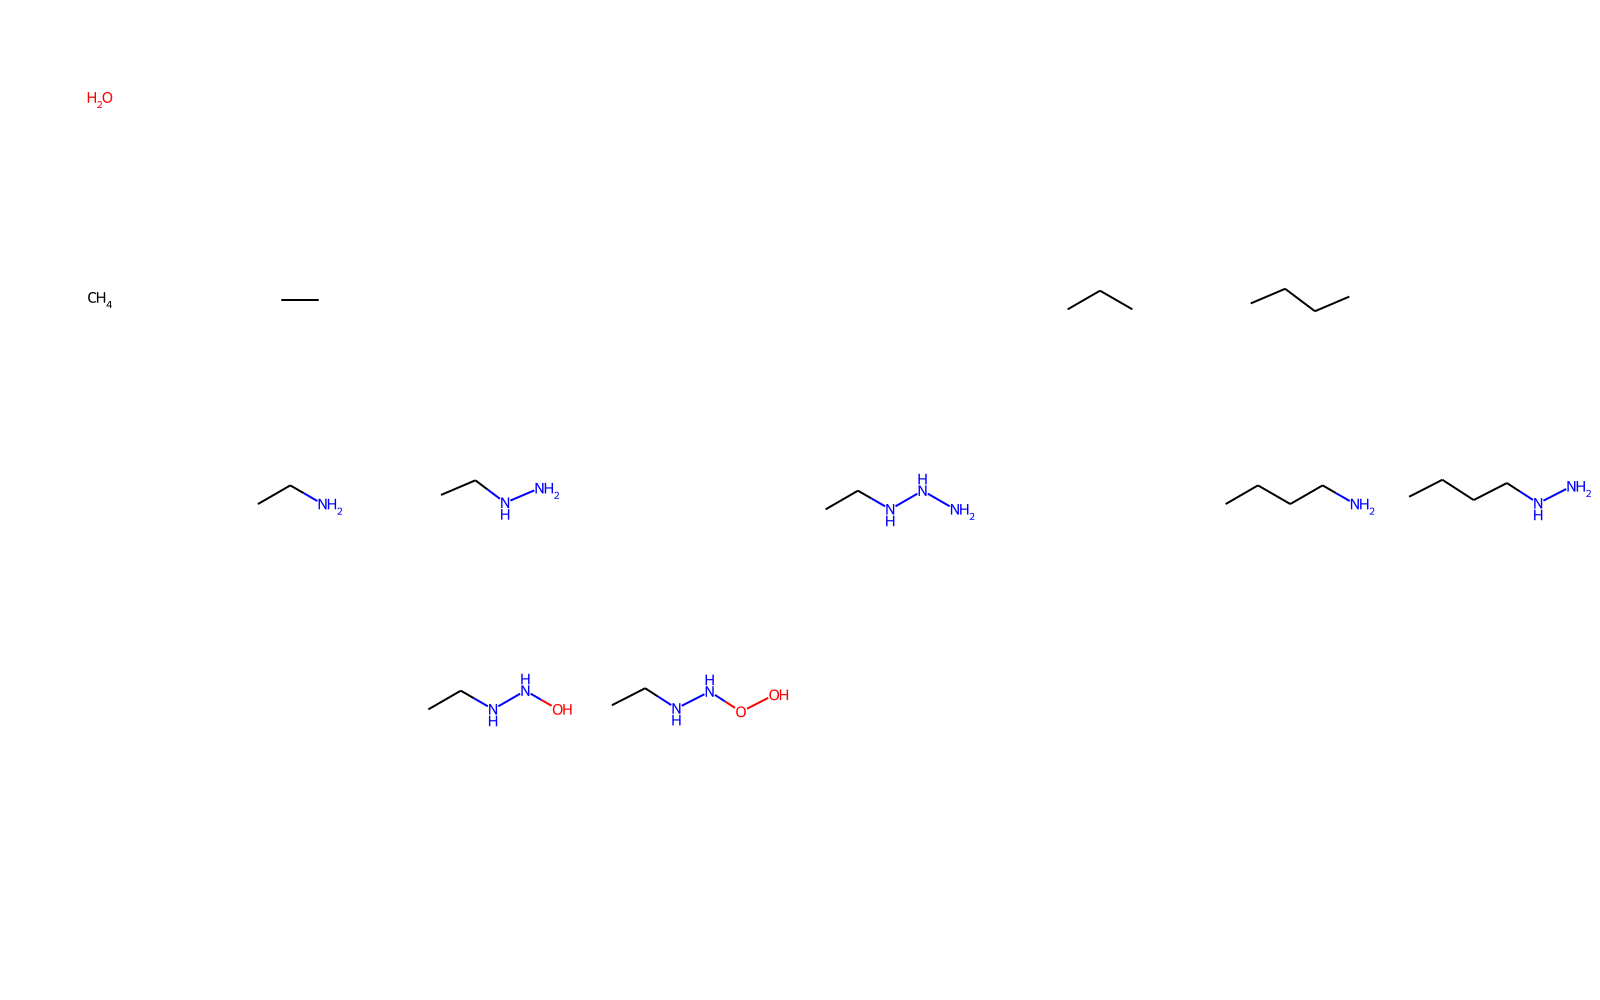

In [176]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in molecule_grid_flat], molsPerRow=8)

In [177]:
f1_grid = [["f1"], [""], [""]]
f2_grid = [["f2", "", "", ""], ["f21", "f22", "", "f23"], ["", "f221", "f222", ""]]

In [178]:
def concat(grid1, grid2):
    combined = []
    for row_counter in range(len(grid1)):
        combined += [grid1[row_counter] + grid2[row_counter]]
    return combined

In [179]:
[""] * 3

['', '', '']

In [180]:
a = ["hi"]
a

['hi']

In [181]:
b = a + [""] * 3
b

['hi', '', '', '']

In [182]:
concat(f1_grid, f2_grid)

[['f1', 'f2', '', '', ''],
 ['', 'f21', 'f22', '', 'f23'],
 ['', '', 'f221', 'f222', '']]

In [183]:
combined = []
for row_counter in range(len(f1_grid)):
    combined += [f1_grid[row_counter] + f2_grid[row_counter]]

combined

[['f1', 'f2', '', '', ''],
 ['', 'f21', 'f22', '', 'f23'],
 ['', '', 'f221', 'f222', '']]

In [184]:
a = [""] * 4
a

['', '', '', '']

In [185]:
a[1] = 7
a

['', 7, '', '']

In [186]:
[[""] * 5]

[['', '', '', '', '']]

In [187]:
[[""]] * 5

[[''], [''], [''], [''], ['']]